<a href="https://colab.research.google.com/github/ajarias01/Modelos/blob/main/Proyecto2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas --quiet

In [ ]:
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import random
from google.colab import files

In [ ]:
uploaded = files.upload()
df = pd.read_csv('flipkart_com-ecommerce_sample.csv')
df = df.dropna()
df.head(10)

Saving flipkart_com-ecommerce_sample.csv to flipkart_com-ecommerce_sample (2).csv


,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,c2d766ca982eca8304150849735ffef9,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FF9KEDEFGF,999.0,379.0,"[""http://img5a.flixcart.com/image/short/u/4/a/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
1,7f7036a6d550aaa89d34c77bd39a5e48,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGU7MFYJFY,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/j/f...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
2,f449ec65dcbc041b6ae5e6a32717d01b,2016-03-25 22:59:23 +0000,http://www.flipkart.com/aw-bellies/p/itmeh4grg...,AW Bellies,"[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH4GRSUBJGZXE,999.0,499.0,"[""http://img5a.flixcart.com/image/shoe/7/z/z/r...",False,Key Features of AW Bellies Sandals Wedges Heel...,No rating available,No rating available,AW,"{""product_specification""=>[{""key""=>""Ideal For""..."
3,0973b37acd0c664e3de26e97e5571454,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2F6HUZMQ6SJ,699.0,267.0,"[""http://img5a.flixcart.com/image/short/6/2/h/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
4,bc940ea42ee6bef5ac7cea3fb5cfbee7,2016-03-25 22:59:23 +0000,http://www.flipkart.com/sicons-all-purpose-arn...,Sicons All Purpose Arnica Dog Shampoo,"[""Pet Supplies >> Grooming >> Skin & Coat Care...",PSOEH3ZYDMSYARJ5,220.0,210.0,"[""http://img5a.flixcart.com/image/pet-shampoo/...",False,Specifications of Sicons All Purpose Arnica Do...,No rating available,No rating available,Sicons,"{""product_specification""=>[{""key""=>""Pet Type"",..."
5,c2a17313954882c1dba461863e98adf2,2016-03-25 22:59:23 +0000,http://www.flipkart.com/eternal-gandhi-super-s...,Eternal Gandhi Super Series Crystal Paper Weig...,"[""Eternal Gandhi Super Series Crystal Paper We...",PWTEB7H2E4KCYUE3,430.0,430.0,"[""http://img5a.flixcart.com/image/paper-weight...",False,Key Features of Eternal Gandhi Super Series Cr...,No rating available,No rating available,Eternal Gandhi,"{""product_specification""=>[{""key""=>""Model Name..."
6,ce5a6818f7707e2cb61fdcdbba61f5ad,2016-03-25 22:59:23 +0000,http://www.flipkart.com/alisha-solid-women-s-c...,Alisha Solid Women's Cycling Shorts,"[""Clothing >> Women's Clothing >> Lingerie, Sl...",SRTEH2FVVKRBAXHB,1199.0,479.0,"[""http://img6a.flixcart.com/image/short/p/j/z/...",False,Key Features of Alisha Solid Women's Cycling S...,No rating available,No rating available,Alisha,"{""product_specification""=>[{""key""=>""Number of ..."
7,8542703ca9e6ebdf6d742638dfb1f2ca,2016-03-25 22:59:23 +0000,http://www.flipkart.com/fabhomedecor-fabric-do...,FabHomeDecor Fabric Double Sofa Bed,"[""Furniture >> Living Room Furniture >> Sofa B...",SBEEH3QGYGHFUEXN,32157.0,22646.0,"[""http://img6a.flixcart.com/image/sofa-bed/e/x...",False,FabHomeDecor Fabric Double Sofa Bed (Finish Co...,No rating available,No rating available,FabHomeDecor,"{""product_specification""=>[{""key""=>""Installati..."
8,29c8d290caa451f97b1c32df64477a2c,2016-03-25 22:59:23 +0000,http://www.flipkart.com/dilli-bazaaar-bellies-...,"dilli bazaaar Bellies, Corporate Casuals, Casuals","[""Footwear >> Women's Footwear >> Ballerinas >...",SHOEH3DZBFR88SCK,699.0,

In [ ]:
print("Seleccione la columna en la que desea realizar la búsqueda:")
print("1 - retail_price")
print("2 - product_name")
print("3 - product_category_tree")


opcion = input("Ingrese el número de opción (1/2/3): ")

columnas_disponibles = {
    "1": "retail_price",
    "2": "product_name",
    "3": "product_category_tree"
}

if opcion not in columnas_disponibles:
    print("Opción inválida. Intente nuevamente.")
else:
    columna = columnas_disponibles[opcion]
    valor = input(f"Ingrese el valor que desea buscar en la columna '{columna}': ")

    if columna in ["retail_price"]:
        try:
            valor = float(valor)
        except ValueError:
            print(f"El valor ingresado para '{columna}' debe ser numérico.")
            valor = None

Seleccione la columna en la que desea realizar la búsqueda:
1 - retail_price
2 - product_name
3 - product_category_tree
Ingrese el número de opción (1/2/3): 1
Ingrese el valor que desea buscar en la columna 'retail_price': 999.0


In [ ]:
def busqueda_binaria(df, columna, valor):

    df_ordenado = df.sort_values(by=columna).reset_index(drop=True)     #O(nlog(n)) debido a ser Quicksort

    izquierda = 0                                                       #1 OE
    derecha = len(df_ordenado) - 1                                      #2 OE
    encontrado_index = -1                                               #1 OE

    inicio = time.time()                                                #1 OE

    while izquierda <= derecha:                                         #1 OE
        medio = (izquierda + derecha) // 2                              #3 OE
        medio_valor = df_ordenado.loc[medio, columna]                   #2 OE

        if type(medio_valor) != type(valor):                            #1 OE
            try:
                medio_valor = type(valor)(medio_valor)
            except (ValueError, TypeError):
                if medio_valor < valor:
                    izquierda = medio + 1
                else:
                    derecha = medio - 1
                continue

        if medio_valor == valor:
            encontrado_index = medio
            break
        elif medio_valor < valor:
            izquierda = medio + 1
        else:
            derecha = medio - 1

    fin = time.time()
    tiempo = fin - inicio

    if encontrado_index == -1:
        return None, tiempo

    if columna in ['retail_price', 'product_category_tree']:
        resultados = []

        i = encontrado_index
        while i >= 0 and df_ordenado.loc[i, columna] == valor:
            resultados.append(df_ordenado.loc[i])
            i -= 1

        i = encontrado_index + 1
        while i < len(df_ordenado) and df_ordenado.loc[i, columna] == valor:
            resultados.append(df_ordenado.loc[i])
            i += 1

        return resultados, tiempo

    return df_ordenado.loc[encontrado_index], tiempo


resultado, t_binaria = busqueda_binaria(df, columna, valor)
if resultado is not None:
    if isinstance(resultado, list):
        if resultado:
            for r in resultado:
                print(r, end="\n\n")
        else:
            print("No se encontraron resultados.")
    else:
        print(resultado)
else:
    print("No se encontraron resultados.")
print(f"Tiempo de ejecución: {t_binaria:.6f} segundos")

Se han truncado las últimas 5000 líneas del flujo de salida.

uniq_id                                     53d2f65b20f00ff7478427cdb7f2cd51
crawl_timestamp                                    2016-05-10 11:57:25 +0000
product_url                http://www.flipkart.com/moladz-flip-flops/p/it...
product_name                                               Moladz Flip Flops
product_category_tree      ["Footwear >> Kids' & Infant Footwear >> For B...
pid                                                         SFFEH2FGABYNF47W
retail_price                                                           999.0
discounted_price                                                       499.0
image                      ["http://img6a.flixcart.com/image/slipper-flip...
is_FK_Advantage_product                                                False
description                Key Features of Moladz Flip Flops Stylish flip...
product_rating                                           No rating available
overall_rating

In [ ]:
def busqueda_lineal(df, columna, valor):
    if valor is None or pd.isnull(valor):
        return None, 0

    import time
    inicio = time.time()

    resultados = []

    for i in range(len(df)):
        valor_actual = df.iloc[i][columna]

        if pd.isnull(valor_actual):
            continue

        if columna == "retail_price":
            try:
                valor_actual = float(valor_actual)
                if valor_actual == float(valor):
                    resultados.append(df.iloc[i])
            except (ValueError, TypeError):
                continue
        else:
            valor_actual = str(valor_actual).strip().lower()
            valor_comparar = str(valor).strip().lower()
            if valor_actual == valor_comparar:
                resultados.append(df.iloc[i])

    fin = time.time()

    if not resultados:
        return None, fin - inicio
    else:
        return resultados, fin - inicio

#Bucle

while True:
    if valor is None:
        print("El valor ingresado es inválido. No se puede buscar.")
        break

    resultado, tiempo = busqueda_lineal(df, columna, valor)

    if resultado is not None:
        if resultado:
            print(f"\n'{valor}' fue encontrado en {len(resultado)} resultado(s):\n")
            for r in resultado:
                print(r, end="\n\n")
        else:
            print("No se encontraron resultados.")
        print(f"Tiempo de ejecución (búsqueda lineal): {tiempo:.6f} segundos")
        break
    else:
        print(f"\n'{valor}' no fue encontrado en la columna '{columna}'.")
        print(f"Tiempo de ejecución (búsqueda lineal): {tiempo:.6f} segundos")
        reintentar = input("¿Deseas intentarlo de nuevo con un nuevo valor? (sí/no): ").strip().lower()
        if reintentar not in ["sí", "si", "s", "yes", "y"]:
            print("Búsqueda finalizada.")
            break
        valor = input(f"Ingrese el nuevo valor que desea buscar en la columna '{columna}': ")
        if columna == "retail_price":
            try:
                valor = float(valor)
            except ValueError:
                print(f"El valor ingresado para '{columna}' debe ser numérico.")
                valor = None


Se han truncado las últimas 5000 líneas del flujo de salida.

uniq_id                                     b6f4ad65a527e5a08606e2917da3b5f1
crawl_timestamp                                    2016-06-03 11:49:18 +0000
product_url                http://www.flipkart.com/ssm-hand-held-bag/p/it...
product_name                                               SSM Hand-held Bag
product_category_tree      ["Bags, Wallets & Belts >> Bags >> Hand Bags >...
pid                                                         HMBEJ9G65DQWP2GW
retail_price                                                           999.0
discounted_price                                                       299.0
image                      ["http://img6a.flixcart.com/image/hand-messeng...
is_FK_Advantage_product                                                False
description                Key Features of SSM Hand-held Bag Ideal For: G...
product_rating                                           No rating available
overall_rating


ANÁLISIS DE RENDIMIENTO
Ejecutando pruebas de rendimiento...
Probando con 100 registros...
Probando con 500 registros...
Probando con 1000 registros...
Probando con 2000 registros...
Probando con 5000 registros...
Probando con 10000 registros...
Probando con 15000 registros...
Probando con 20000 registros...


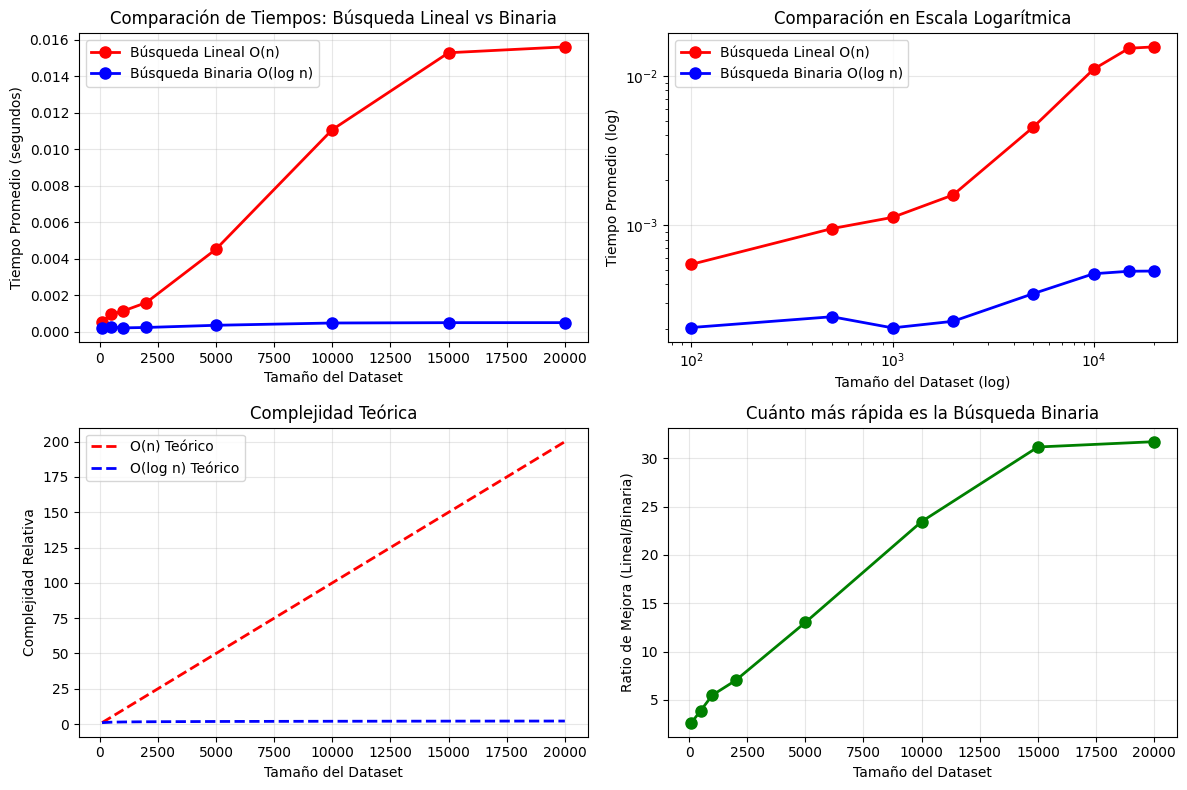


RESULTADOS DE LA COMPARACIÓN
Tamaño     Lineal (s)   Binaria (s)  Mejora    
--------------------------------------------------------------------------------
100        0.000546     0.000206     2.65      x
500        0.000947     0.000243     3.89      x
1000       0.001126     0.000205     5.50      x
2000       0.001590     0.000227     7.02      x
5000       0.004517     0.000347     13.02     x
10000      0.011070     0.000472     23.45     x
15000      0.015286     0.000490     31.17     x
20000      0.015607     0.000492     31.72     x


In [ ]:
def graficar_comparacion_busquedas(df, columna, num_pruebas=10):
    tamaños = [100, 500, 1000, 2000, 5000, 10000, 15000, 20000]
    tiempos_lineal = []
    tiempos_binaria = []

    valores_unicos = df[columna].unique()

    print("Ejecutando pruebas de rendimiento...")

    for tamaño in tamaños:
        print(f"Probando con {tamaño} registros...")

        df_subset = df.head(tamaño).copy()

        tiempos_lin_temp = []
        tiempos_bin_temp = []

        for _ in range(num_pruebas):
            valor_buscar = random.choice(valores_unicos)

            _, tiempo_lin = busqueda_lineal(df_subset, columna, valor_buscar)
            tiempos_lin_temp.append(tiempo_lin)

            _, tiempo_bin = busqueda_binaria(df_subset, columna, valor_buscar)
            tiempos_bin_temp.append(tiempo_bin)

        tiempos_lineal.append(np.mean(tiempos_lin_temp))
        tiempos_binaria.append(np.mean(tiempos_bin_temp))

    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(tamaños, tiempos_lineal, 'ro-', label='Búsqueda Lineal O(n)', linewidth=2, markersize=8)
    plt.plot(tamaños, tiempos_binaria, 'bo-', label='Búsqueda Binaria O(log n)', linewidth=2, markersize=8)
    plt.xlabel('Tamaño del Dataset')
    plt.ylabel('Tiempo Promedio (segundos)')
    plt.title('Comparación de Tiempos: Búsqueda Lineal vs Binaria')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 2)
    plt.loglog(tamaños, tiempos_lineal, 'ro-', label='Búsqueda Lineal O(n)', linewidth=2, markersize=8)
    plt.loglog(tamaños, tiempos_binaria, 'bo-', label='Búsqueda Binaria O(log n)', linewidth=2, markersize=8)
    plt.xlabel('Tamaño del Dataset (log)')
    plt.ylabel('Tiempo Promedio (log)')
    plt.title('Comparación en Escala Logarítmica')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 3)
    n_teorico = np.array(tamaños)
    o_n = n_teorico / n_teorico[0]
    o_log_n = np.log2(n_teorico) / np.log2(n_teorico[0])

    plt.plot(tamaños, o_n, 'r--', label='O(n) Teórico', linewidth=2)
    plt.plot(tamaños, o_log_n, 'b--', label='O(log n) Teórico', linewidth=2)
    plt.xlabel('Tamaño del Dataset')
    plt.ylabel('Complejidad Relativa')
    plt.title('Complejidad Teórica')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.subplot(2, 2, 4)
    ratios = [lin/bin if bin > 0 else 0 for lin, bin in zip(tiempos_lineal, tiempos_binaria)]
    plt.plot(tamaños, ratios, 'go-', linewidth=2, markersize=8)
    plt.xlabel('Tamaño del Dataset')
    plt.ylabel('Ratio de Mejora (Lineal/Binaria)')
    plt.title('Cuánto más rápida es la Búsqueda Binaria')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("\n" + "="*80)
    print("RESULTADOS DE LA COMPARACIÓN")
    print("="*80)
    print(f"{'Tamaño':<10} {'Lineal (s)':<12} {'Binaria (s)':<12} {'Mejora':<10}")
    print("-"*80)
    for i, tamaño in enumerate(tamaños):
        mejora = tiempos_lineal[i] / tiempos_binaria[i] if tiempos_binaria[i] > 0 else 0
        print(f"{tamaño:<10} {tiempos_lineal[i]:<12.6f} {tiempos_binaria[i]:<12.6f} {mejora:<10.2f}x")

if valor is not None:
    print("\n" + "="*50)
    print("ANÁLISIS DE RENDIMIENTO")
    print("="*50)


    graficar_comparacion_busquedas(df, columna)